# Setting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
train = pd.read_csv('train_평점추가.csv')
test = pd.read_csv('test_평점추가.csv')
submission = pd.read_csv('submission.csv')

In [3]:
train = train.replace(0, train.mean())
test = test.replace(0, test.mean())

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      600 non-null    float64
 1   title           600 non-null    object 
 2   distributor     600 non-null    object 
 3   genre           600 non-null    object 
 4   release_time    600 non-null    object 
 5   time            600 non-null    int64  
 6   screening_rat   600 non-null    object 
 7   director        600 non-null    object 
 8   dir_prev_bfnum  600 non-null    float64
 9   dir_prev_num    600 non-null    float64
 10  num_staff       600 non-null    float64
 11  num_actor       600 non-null    float64
 12  box_off_num     600 non-null    int64  
 13  star_score      600 non-null    object 
dtypes: float64(5), int64(2), object(7)
memory usage: 65.8+ KB


In [5]:
train.head()

,Unnamed: 0,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,star_score
0,299.5,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,4.726993e+05,0.876667,91.0,2.0,23398,7.3
1,1.0,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1.161602e+06,2.000000,387.0,3.0,7072501,9.0
2,2.0,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,2.207752e+05,4.000000,343.0,4.0,6959083,7.12
3,3.0,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,2.389400e+04,2.000000,20.0,6.0,217866,6.13
4,4.0,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.000000e+00,1.000000,251.0,2.0,483387,8.16


In [6]:
print(train.shape)
print(test.shape)  # train set에 box_off_num(관객수)만 빠짐 
print(submission.shape)

(600, 14)
(243, 13)
(243, 2)


In [7]:
del train['Unnamed: 0']
del test['Unnamed: 0']

In [8]:
train=train.replace('평점없음', 0)
test=test.replace('평점없음', 0)

In [9]:
train['star_score']=train['star_score'].astype(float)
test['star_score']=test['star_score'].astype(float)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  600 non-null    float64
 8   dir_prev_num    600 non-null    float64
 9   num_staff       600 non-null    float64
 10  num_actor       600 non-null    float64
 11  box_off_num     600 non-null    int64  
 12  star_score      600 non-null    float64
dtypes: float64(5), int64(2), object(6)
memory usage: 61.1+ KB


In [11]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,star_score
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,4.726993e+05,0.876667,91.0,2.0,23398,7.30
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1.161602e+06,2.000000,387.0,3.0,7072501,9.00
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,2.207752e+05,4.000000,343.0,4.0,6959083,7.12
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,2.389400e+04,2.000000,20.0,6.0,217866,6.13
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.000000e+00,1.000000,251.0,2.0,483387,8.16


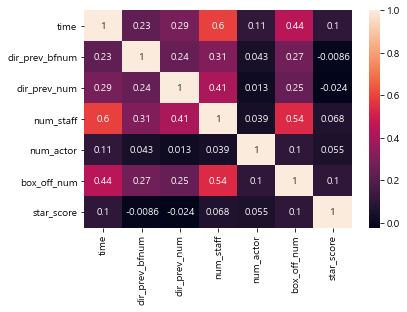

In [12]:
sns.heatmap(train.corr(), annot = True)

# Feature Engineering

In [13]:
# director 변수 제거
train = train.drop('director', axis=1)
test = test.drop('director', axis=1)
train.head(3)

,title,distributor,genre,release_time,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,star_score
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,4.726993e+05,0.876667,91.0,2.0,23398,7.30
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,1.161602e+06,2.000000,387.0,3.0,7072501,9.00
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,2.207752e+05,4.000000,343.0,4.0,6959083,7.12


In [14]:
#장르 라벨링
from sklearn import preprocessing
train['genre'].unique()

array(['액션', '느와르', '코미디', '다큐멘터리', '뮤지컬', '드라마', '멜로/로맨스', '공포', '서스펜스',
       '애니메이션', '미스터리', 'SF'], dtype=object)

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['genre'] = le.fit_transform(train['genre'])
train['genre']

0      10
1       2
2      10
3      11
4      11
       ..
595     4
596     4
597     1
598     2
599    10
Name: genre, Length: 600, dtype: int32

In [16]:
test['genre'] = le.transform(test['genre'])
test['genre']

0       2
1       5
2       4
3      10
4       1
       ..
238     4
239     3
240     2
241     4
242     5
Name: genre, Length: 243, dtype: int32

In [17]:
train.groupby('genre').box_off_num.mean().sort_values()

genre
6     6.627000e+03
3     6.717226e+04
8     8.261100e+04
9     1.819267e+05
5     4.259680e+05
7     5.275482e+05
1     5.908325e+05
4     6.256898e+05
11    1.193914e+06
0     1.788346e+06
10    2.203974e+06
2     2.263695e+06
Name: box_off_num, dtype: float64

In [18]:
print(le.classes_)  # 0~11까지 라벨링 (SF는 0, 코미디는 11)

['SF' '공포' '느와르' '다큐멘터리' '드라마' '멜로/로맨스' '뮤지컬' '미스터리' '서스펜스' '애니메이션' '액션'
 '코미디']


선형 계열 모델(릿지, 라쏘, 엘라스틱넷, 로지스틱회귀, SVM 등)에선 Label encoding 대신 one-hot encoding 사용

In [19]:
train['genre_rank'] = train.genre.map({6 : 1, 3 : 2, 8 : 3, 9 : 4, 5 : 5,
                                      7 : 6, 1 : 7, 4 : 8, 11 : 9, 0 : 10, 10 : 11, 2 : 12})
test['genre_rank'] = test.genre.map({6 : 1, 3 : 2, 8 : 3, 9 : 4, 5 : 5,
                                      7 : 6, 1 : 7, 4 : 8, 11 : 9, 0 : 10, 10 : 11, 2 : 12})

train.head()

,title,distributor,genre,release_time,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,star_score,genre_rank
0,개들의 전쟁,롯데엔터테인먼트,10,2012-11-22,96,청소년 관람불가,4.726993e+05,0.876667,91.0,2.0,23398,7.30,11
1,내부자들,(주)쇼박스,2,2015-11-19,130,청소년 관람불가,1.161602e+06,2.000000,387.0,3.0,7072501,9.00,12
2,은밀하게 위대하게,(주)쇼박스,10,2013-06-05,123,15세 관람가,2.207752e+05,4.000000,343.0,4.0,6959083,7.12,11
3,나는 공무원이다,(주)NEW,11,2012-07-12,101,전체 관람가,2.389400e+04,2.000000,20.0,6.0,217866,6.13,9
4,불량남녀,쇼박스(주)미디어플렉스,11,2010-11-04,108,15세 관람가,1.000000e+00,1.000000,251.0,2.0,483387,8.16,9


장르별 영화 관객수 평균값으로 랭크 갱신 -> 낮은 관객수 장르(뮤지컬 -> 1) 에서부터 높은 관객수 장르(느와르 -> 12)

In [20]:
#배급사 라벨링(dist_rank)
train['distributor'] = train.distributor.str.replace("(주)","")
test['distributor'] = test.distributor.str.replace("(주)","")

import re

train['distributor'] = [re.sub(r'[^0-9a-zA-Z가-힣]', '', x) for x in train.distributor]
test['distributor'] = [re.sub(r'[^0-9a-zA-Z가-힣]', '', x) for x in test.distributor]

In [21]:
train.groupby('distributor').box_off_num.median().sort_values()

distributor
인피니티엔터테인먼트            2.0
고구마공작소                8.0
사람과사람들               42.0
위드시네마                46.0
나우콘텐츠                54.0
                  ...    
CJEM영화부문        2242510.0
영구아트무비          2541603.0
쇼박스미디어플렉스       2634823.0
아이필름코퍼레이션       3117859.0
CJEMPictures    4122337.0
Name: box_off_num, Length: 159, dtype: float64

In [22]:
dist_rank = train.groupby('distributor').box_off_num.median().reset_index(name = 'dist_rank').sort_values(by = 'dist_rank')
dist_rank['dist_rank'] = [i+1 for i in range(dist_rank.shape[0])]
dist_rank

,distributor,dist_rank
122,인피니티엔터테인먼트,1
21,고구마공작소,2
61,사람과사람들,3
109,위드시네마,4
25,나우콘텐츠,5
...,...,...
5,CJEM영화부문,155
96,영구아트무비,156
66,쇼박스미디어플렉스,157
87,아이필름코퍼레이션,158


배급사별 영화 관객수 중위값으로 랭크 갱신 -> 중위값 작은 것부터 1 ~ 큰거 159

In [23]:
train = pd.merge(train, dist_rank, how = 'left')
test = pd.merge(test, dist_rank, how= 'left')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    int32  
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   dir_prev_bfnum  600 non-null    float64
 7   dir_prev_num    600 non-null    float64
 8   num_staff       600 non-null    float64
 9   num_actor       600 non-null    float64
 10  box_off_num     600 non-null    int64  
 11  star_score      600 non-null    float64
 12  genre_rank      600 non-null    int64  
 13  dist_rank       600 non-null    int64  
dtypes: float64(5), int32(1), int64(4), object(4)
memory usage: 68.0+ KB


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 242
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    int32  
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   dir_prev_bfnum  243 non-null    float64
 7   dir_prev_num    243 non-null    float64
 8   num_staff       243 non-null    float64
 9   num_actor       243 non-null    float64
 10  star_score      243 non-null    float64
 11  genre_rank      243 non-null    int64  
 12  dist_rank       210 non-null    float64
dtypes: float64(6), int32(1), int64(2), object(4)
memory usage: 25.6+ KB


In [25]:
# test dist_rank의 null값 0으로 채우기
test.fillna(0, inplace=True)

In [26]:
# 상영등급(screening_rat) 라벨링
train['screening_rat'].unique()

array(['청소년 관람불가', '15세 관람가', '전체 관람가', '12세 관람가'], dtype=object)

In [27]:
train.groupby('screening_rat').box_off_num.median().sort_values()

screening_rat
청소년 관람불가      3008.5
전체 관람가        8325.0
12세 관람가      19323.0
15세 관람가     242381.0
Name: box_off_num, dtype: float64

In [28]:
train.groupby('screening_rat').box_off_num.mean().sort_values()

screening_rat
전체 관람가      1.351005e+05
청소년 관람불가    3.641813e+05
12세 관람가     8.449809e+05
15세 관람가     1.247519e+06
Name: box_off_num, dtype: float64

중앙값보단 평균으로 sort하는 것이 나을듯

In [29]:
train['screening_rat'] = le.fit_transform(train['screening_rat'])
train['screening_rat']

0      3
1      3
2      1
3      2
4      1
      ..
595    3
596    1
597    3
598    1
599    1
Name: screening_rat, Length: 600, dtype: int32

In [30]:
test['screening_rat'] = le.fit_transform(test['screening_rat'])
test['screening_rat']

0      3
1      0
2      0
3      1
4      1
      ..
238    1
239    0
240    3
241    3
242    3
Name: screening_rat, Length: 243, dtype: int32

In [31]:
train.groupby('screening_rat').box_off_num.mean().sort_values()

screening_rat
2    1.351005e+05
3    3.641813e+05
0    8.449809e+05
1    1.247519e+06
Name: box_off_num, dtype: float64

In [32]:
print(le.classes_)   #청불의 관객수 평균값이 가장 높음

['12세 관람가' '15세 관람가' '전체 관람가' '청소년 관람불가']


In [33]:
train['screening_rank'] = train.screening_rat.map({2 : 1, 3 : 2, 0 : 3, 1 : 4})
test['screening_rank'] = test.screening_rat.map({2 : 1, 3 : 2, 0 : 3, 1 : 4})

train.head()

,title,distributor,genre,release_time,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,star_score,genre_rank,dist_rank,screening_rank
0,개들의 전쟁,롯데엔터테인먼트,10,2012-11-22,96,3,4.726993e+05,0.876667,91.0,2.0,23398,7.30,11,143,2
1,내부자들,쇼박스,2,2015-11-19,130,3,1.161602e+06,2.000000,387.0,3.0,7072501,9.00,12,154,2
2,은밀하게 위대하게,쇼박스,10,2013-06-05,123,1,2.207752e+05,4.000000,343.0,4.0,6959083,7.12,11,154,4
3,나는 공무원이다,NEW,11,2012-07-12,101,2,2.389400e+04,2.000000,20.0,6.0,217866,6.13,9,148,1
4,불량남녀,쇼박스미디어플렉스,11,2010-11-04,108,1,1.000000e+00,1.000000,251.0,2.0,483387,8.16,9,157,4


In [34]:
# 개봉일(release_time) 'month'만 가져오기
train['month'] = train['release_time'].str[5:7].astype(int)
test['month'] = test['release_time'].str[5:7].astype(int)
train.head(3)

,title,distributor,genre,release_time,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,star_score,genre_rank,dist_rank,screening_rank,month
0,개들의 전쟁,롯데엔터테인먼트,10,2012-11-22,96,3,4.726993e+05,0.876667,91.0,2.0,23398,7.30,11,143,2,11
1,내부자들,쇼박스,2,2015-11-19,130,3,1.161602e+06,2.000000,387.0,3.0,7072501,9.00,12,154,2,11
2,은밀하게 위대하게,쇼박스,10,2013-06-05,123,1,2.207752e+05,4.000000,343.0,4.0,6959083,7.12,11,154,4,6


In [35]:
train.groupby('month').box_off_num.mean().sort_values()

month
4     2.581667e+05
3     2.738874e+05
10    3.859042e+05
11    4.956539e+05
6     5.122865e+05
5     5.756852e+05
2     6.630252e+05
9     7.315286e+05
8     1.029162e+06
7     1.113807e+06
12    1.288248e+06
1     1.365931e+06
Name: box_off_num, dtype: float64

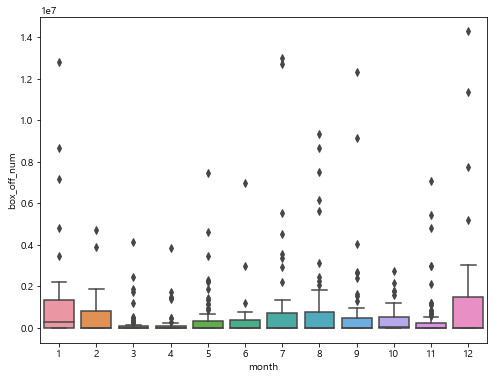

In [36]:
f, ax = plt.subplots(figsize = (8,6))
sns.boxplot(x='month', y='box_off_num', data=train[['month', 'box_off_num']])

In [37]:
# 배우 1명당 스태프 수
train.loc[train['num_actor']>0, 'staff_per_actor'] = train['num_staff'] / train['num_actor']
test.loc[train['num_actor']>0, 'staff_per_actor'] = test['num_staff'] / test['num_actor']

train = train.replace([np.inf, -np.inf], np.nan)
test = test.replace([np.inf, -np.inf], np.nan)

train['staff_per_actor'] = train['staff_per_actor'].fillna(train.mean())
test['staff_per_actor']=test['staff_per_actor'].fillna(train.mean())
test['staff_per_actor'].unique()

array([1.01333333e+02, 9.16666667e+01, 5.98571429e+01, 2.04000000e+02,
       3.80000000e+02, 7.80000000e+01, 5.50000000e+00, 2.34000000e+01,
       7.60000000e+01, 8.50000000e+01, 6.80000000e+01, 3.19000000e+02,
       3.44444444e+01, 7.57142857e+00, 1.02666667e+02, 1.29250000e+02,
       2.72500000e+01, 1.64500000e+02, 7.90000000e+01, 1.59316872e+01,
       1.42857143e+00, 3.85000000e+01, 5.47500000e+01, 1.40000000e+00,
       3.66666667e+00, 1.48666667e+02, 1.00000000e+00, 1.13666667e+02,
       3.42500000e+01, 6.85000000e+01, 2.87573964e-01, 2.72727273e-01,
       2.87500000e+01, 2.20000000e+01, 5.00000000e+00, 1.55000000e+01,
       1.62500000e+01, 1.95000000e+01, 1.45555556e+01, 2.57142857e+00,
       8.20000000e+00, 2.77500000e+01, 4.42857143e+00, 5.26666667e+01,
       4.20000000e+01, 8.00000000e+00, 4.00000000e+00, 1.19500000e+02,
       1.92000000e+01, 6.30000000e+01, 6.87500000e+01, 3.66000000e+01,
       7.00000000e+00, 1.59000000e+02, 1.95000000e+02, 4.75714286e+01,
      

In [38]:
# 제목 글자수 변수(공백 포함)
title_len = []
for i in train['title']:
    a = len(i)
    title_len.append(a)
    
title_len = pd.DataFrame(title_len)

train['title_len'] = title_len
train.head(3)

,title,distributor,genre,release_time,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,star_score,genre_rank,dist_rank,screening_rank,month,staff_per_actor,title_len
0,개들의 전쟁,롯데엔터테인먼트,10,2012-11-22,96,3,4.726993e+05,0.876667,91.0,2.0,23398,7.30,11,143,2,11,45.50,6
1,내부자들,쇼박스,2,2015-11-19,130,3,1.161602e+06,2.000000,387.0,3.0,7072501,9.00,12,154,2,11,129.00,4
2,은밀하게 위대하게,쇼박스,10,2013-06-05,123,1,2.207752e+05,4.000000,343.0,4.0,6959083,7.12,11,154,4,6,85.75,9


In [39]:
title_len = []
for i in test['title']:
    a = len(i)
    title_len.append(a)
    
title_len = pd.DataFrame(title_len)

test['title_len'] = title_len
test.head(3)

,title,distributor,genre,release_time,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,star_score,genre_rank,dist_rank,screening_rank,month,staff_per_actor,title_len
0,용서는 없다,시네마서비스,2,2010-01-07,125,3,3.005290e+05,2.0,304.0,3.0,7.62,12,140.0,2,1,101.333333,6
1,아빠가 여자를 좋아해,쇼박스,5,2010-01-14,113,0,3.427002e+05,4.0,275.0,3.0,7.87,5,154.0,3,1,91.666667,11
2,하모니,CJ엔터테인먼트,4,2010-01-28,115,0,4.206611e+06,3.0,419.0,7.0,0.00,8,149.0,3,1,59.857143,3


star_score(네이버영화 별점), genre_rank(장르별 관객수 평균 랭크), dist_rank(배급사별 관객수 중위값 랭크), screening_rank(상영등급별 관객수 평균 랭크), month(개봉일자의 월), staff_per_actor(배우 한 명당 스태프 수), staff_per_actor, title_len(제목 길이) 변수 추가 完

# EDA

In [40]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 599
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            600 non-null    object 
 1   distributor      600 non-null    object 
 2   genre            600 non-null    int32  
 3   release_time     600 non-null    object 
 4   time             600 non-null    int64  
 5   screening_rat    600 non-null    int32  
 6   dir_prev_bfnum   600 non-null    float64
 7   dir_prev_num     600 non-null    float64
 8   num_staff        600 non-null    float64
 9   num_actor        600 non-null    float64
 10  box_off_num      600 non-null    int64  
 11  star_score       600 non-null    float64
 12  genre_rank       600 non-null    int64  
 13  dist_rank        600 non-null    int64  
 14  screening_rank   600 non-null    int64  
 15  month            600 non-null    int32  
 16  staff_per_actor  600 non-null    float64
 17  title_len       

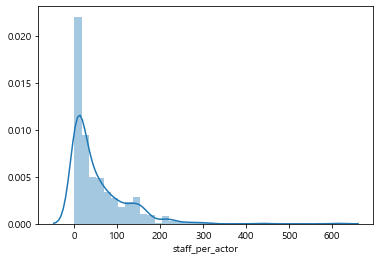

In [41]:
sns.distplot(train['staff_per_actor'])

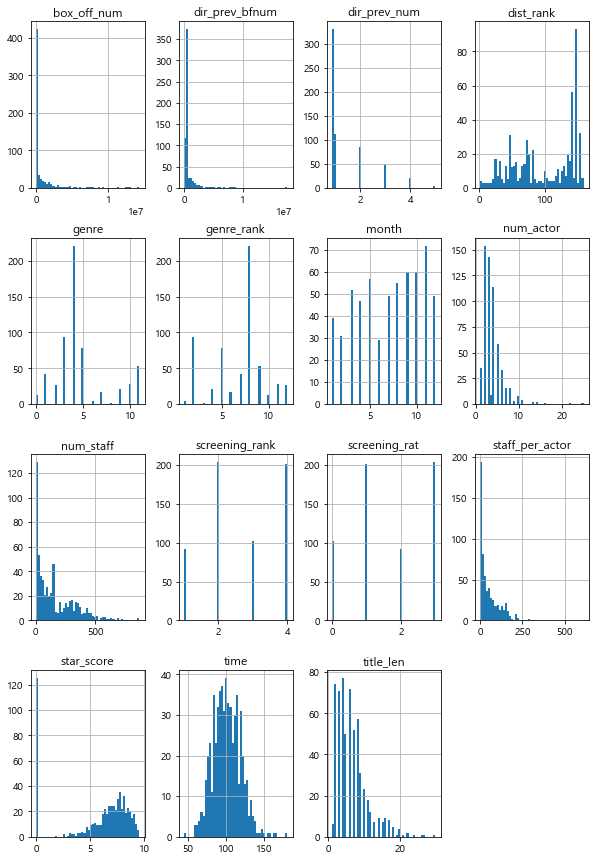

In [42]:
train.hist(bins=50, figsize=(10,15))
plt.show()

In [43]:
train = train.drop(['genre', 'screening_rat'], axis= 1)
test = test.drop(['genre', 'screening_rat'], axis= 1)

In [44]:
#왜도
print(train['dir_prev_bfnum'].skew())
print(train['dir_prev_num'].skew())
print(train['num_actor'].skew())
print(train['num_staff'].skew())
print(train['staff_per_actor'].skew())
print(train['title_len'].skew())

6.77469857886737
1.9563661516101347
3.0982682964893855
1.2190597784830792
2.4220675404876273
1.60016087812632


In [45]:
#첨도
print(train['dir_prev_bfnum'].kurt())
print(train['dir_prev_num'].kurt())
print(train['num_actor'].kurt())
print(train['num_staff'].kurt())
print(train['staff_per_actor'].kurt())
print(train['title_len'].kurt())

68.75100884875246
3.231599179452693
17.687101300991234
1.2174975220671662
11.26647004691761
3.4944540463070464


In [46]:
# dir_prev_bfnum, num_actor, staff_per_actor, (title_len) 로그 스케일링
train['dir_prev_bfnum'] = np.log1p(train['dir_prev_bfnum'])
train['num_actor'] = np.log1p(train['num_actor'])
train['staff_per_actor'] = np.log1p(train['staff_per_actor'])
train['title_len'] = np.log1p(train['title_len'])

test['dir_prev_bfnum'] = np.log1p(test['dir_prev_bfnum'])
test['num_actor'] = np.log1p(test['num_actor'])
test['staff_per_actor'] = np.log1p(test['staff_per_actor'])
test['title_len'] = np.log1p(test['title_len'])

In [47]:
print(train['dir_prev_bfnum'].skew(), train['dir_prev_bfnum'].kurt())
print(train['num_actor'].skew(), train['num_actor'].kurt())
print(train['staff_per_actor'].skew(), train['staff_per_actor'].kurt())
print(train['title_len'].skew(), train['title_len'].kurt())

-2.3563195824207783 6.065569271399079
0.5763164369019238 0.9715721548839427
-0.4091768250886339 -0.8103405761298781
0.16009393954899057 -0.4280938193848356


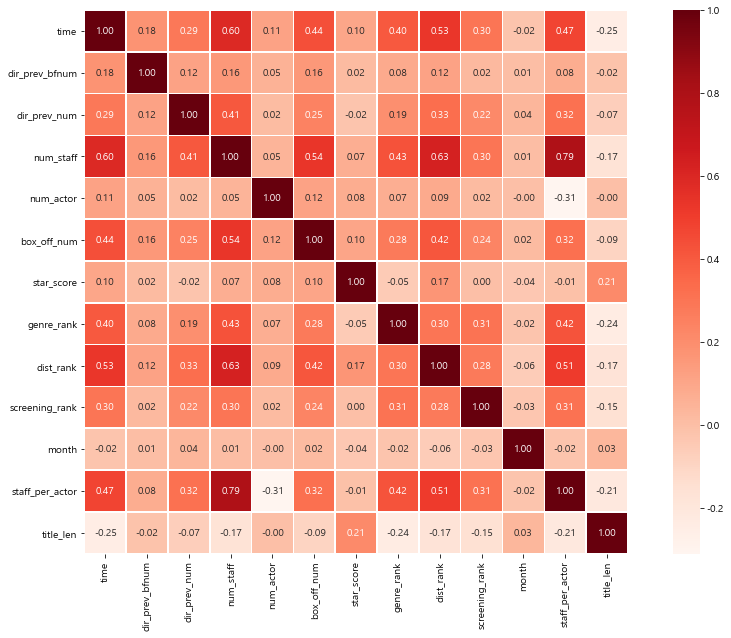

In [48]:
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(train.corr(), annot = True, square=True, fmt = '.2f', linewidths=.5, cmap='Reds')

# Modeling

In [49]:
train.head()
train.columns[3:]

Index(['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor',
       'box_off_num', 'star_score', 'genre_rank', 'dist_rank',
       'screening_rank', 'month', 'staff_per_actor', 'title_len'],
      dtype='object')

In [50]:
features = ['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor', 
            'genre_rank', 'dist_rank', 'star_score', 
            'screening_rank', 'month', 'staff_per_actor', 'title_len']
target = ['box_off_num']

X_train, X_test, y_train = train[features], test[features], train[target]

In [51]:
import statsmodels.api as sm

In [52]:
variables = features ## 설명 변수 리스트
 
y = y_train ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = train[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X.astype(float)).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = train[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(train[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

<ipython-input-52-ac7353cf9db8>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value


In [53]:
selected_variables

['num_staff', 'staff_per_actor', 'time', 'screening_rank']

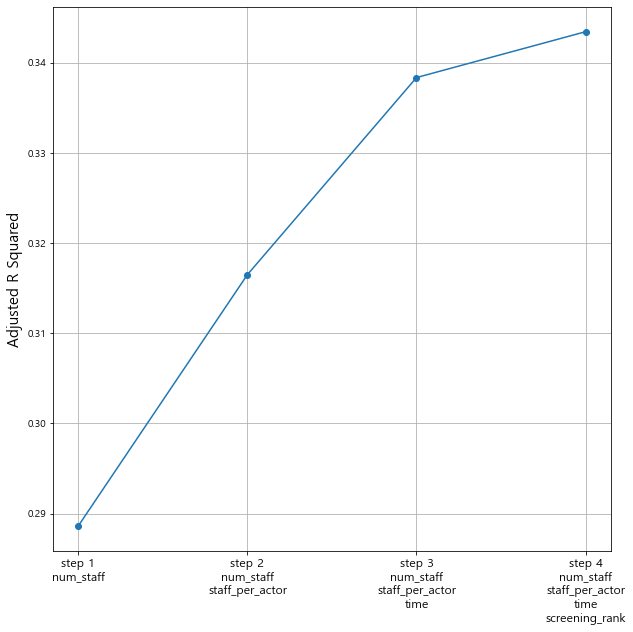

In [54]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

# ------------------------------------------------------------

In [55]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
import lightgbm as lgb
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score, train_test_split


In [56]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state=52))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=52))
lgbm = lgb.LGBMRegressor(random_state = 52)
xgb = XGBRegressor(random_state=52)
gbr = GradientBoostingRegressor(random_state=52)
rf = RandomForestRegressor(random_state=52)

In [57]:
y_train = np.log1p(y_train)

In [58]:
lb = ['LGBMRegressor','XGBRegressor', 'GradientBoostingRegressor', 
      'RandomForestRegressor', 'LassoRegressor', 'ElasticNetRegressor']
all_md = [lgbm,xgb, gbr, rf, lasso, ENet]

all_rmse = []
for model, label in zip(all_md, lb):
    model.fit(X_train, y_train)
    pred = np.expm1([0 if x<0 else x for x in model.predict(X_train)])
    all_rmse.append({f'{label}' : mean_squared_error(y_train, pred, squared=False)})

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-58-28e0f474ceb3>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


In [59]:
all_rmse

[{'LGBMRegressor': 1432293.9485285124},
 {'XGBRegressor': 1944719.8341817313},
 {'GradientBoostingRegressor': 1181537.796640196},
 {'RandomForestRegressor': 1365785.8136052026},
 {'LassoRegressor': 1825270.7402591417},
 {'ElasticNetRegressor': 1825771.7092649455}]

가능한 모든 변수들을 feature에 넣었을 때, 
[{'LGBMRegressor': 1432293.9485285124},
 {'XGBRegressor': 1944719.8341817313},
 {'GradientBoostingRegressor': 1181537.796640196},
 {'RandomForestRegressor': 1365785.8136052026}]

# -----------------------------------------------------------------

In [60]:
features = ['dist_rank', 'num_staff', 'time', 'star_score', 'title_len']
target = ['box_off_num']

X_train, X_test, y_train = train[features], test[features], train[target]
y_train = np.log1p(y_train)

In [61]:
lb = ['LGBMRegressor','XGBRegressor', 'GradientBoostingRegressor', 
      'RandomForestRegressor', 'LassoRegressor', 'ElasticNetRegressor']
all_md = [lgbm,xgb, gbr, rf, lasso, ENet]

all_rmse = []
for model, label in zip(all_md, lb):
    model.fit(X_train, y_train)
    pred = np.expm1([0 if x<0 else x for x in model.predict(X_train)])
    all_rmse.append({f'{label}' : mean_squared_error(y_train, pred, squared=False)})

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-61-28e0f474ceb3>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


In [62]:
all_rmse

[{'LGBMRegressor': 1394912.4650451858},
 {'XGBRegressor': 1905654.3732795562},
 {'GradientBoostingRegressor': 1189042.642471431},
 {'RandomForestRegressor': 1432121.2045578656},
 {'LassoRegressor': 1621622.529239472},
 {'ElasticNetRegressor': 1622342.3008069736}]

# ------------------------------------------------------------

In [63]:
features = ['num_staff', 'staff_per_actor', 'time', 'screening_rank']
target = ['box_off_num']

X_train, X_test, y_train = train[features], test[features], train[target]
y_train = np.log1p(y_train)

In [64]:
lb = ['LGBMRegressor','XGBRegressor', 'GradientBoostingRegressor', 
      'RandomForestRegressor', 'LassoRegressor', 'ElasticNetRegressor']
all_md = [lgbm,xgb, gbr, rf, lasso, ENet]

all_rmse = []
for model, label in zip(all_md, lb):
    model.fit(X_train, y_train)
    pred = np.expm1([0 if x<0 else x for x in model.predict(X_train)])
    all_rmse.append({f'{label}' : mean_squared_error(y_train, pred, squared=False)})

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-64-28e0f474ceb3>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


In [65]:
all_rmse

[{'LGBMRegressor': 967317.668675115},
 {'XGBRegressor': 1724542.5574696222},
 {'GradientBoostingRegressor': 876913.8449198669},
 {'RandomForestRegressor': 1171618.801931222},
 {'LassoRegressor': 20762066.912610568},
 {'ElasticNetRegressor': 20740210.995468624}]

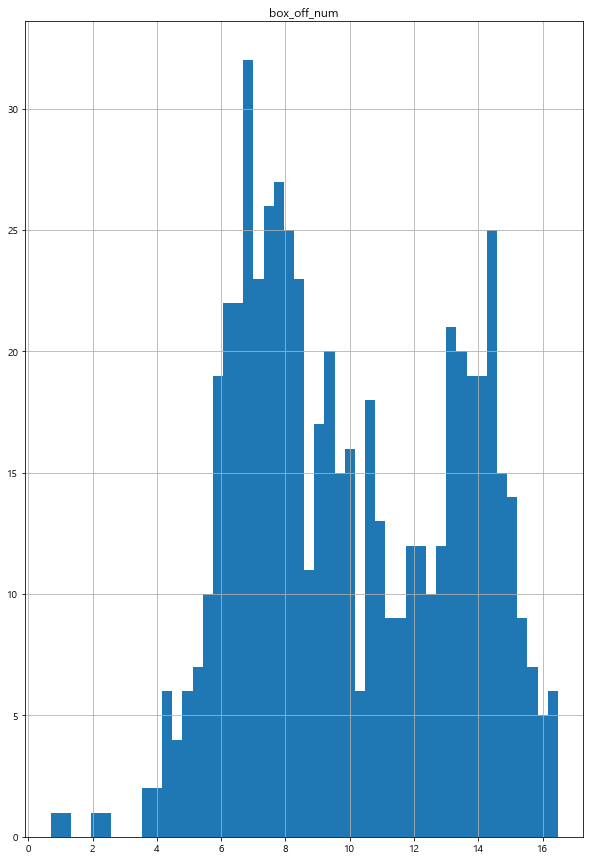

In [70]:
y_train.hist(bins=50, figsize=(10,15))
plt.show()

In [66]:
#블랜딩
rf_pred = np.expm1([0 if x <0 else x for x in rf.predict(X_test)])
len(rf_pred)

243

In [67]:
gbr_pred = np.expm1([0 if x <0 else x for x in gbr.predict(X_test)])
lgbm_pred = np.expm1([0 if x <0 else x for x in lgbm.predict(X_test)])

In [68]:
blending = submission.copy()
blending['box_off_num'] = (lgbm_pred+rf_pred+gbr_pred) / 3
blending.sort_values(by='box_off_num',

SyntaxError: unexpected EOF while parsing (<ipython-input-68-1c657d42ba3d>, line 3)

In [ ]:
blending.to_csv('blending2.csv', index=False, encoding='utf-8-sig')